# Import All Dependencies/Library:

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pathlib

# Map the Dataset By using 'Path' Library:

In [3]:
data_dir=pathlib.Path('C:\\Users\\Ritesh\\OneDrive\\Desktop\\Healthcare')#We have to give path in which our datset is stored

In [4]:
len(list(data_dir.glob('*/*.jpeg')))

101

# Data PreProcessing:

In [5]:
ECG=list(data_dir.glob('ECG/*'))
ECG

[WindowsPath('C:/Users/Ritesh/OneDrive/Desktop/Healthcare/ECG/image16.jpeg'),
 WindowsPath('C:/Users/Ritesh/OneDrive/Desktop/Healthcare/ECG/image59.jpeg')]

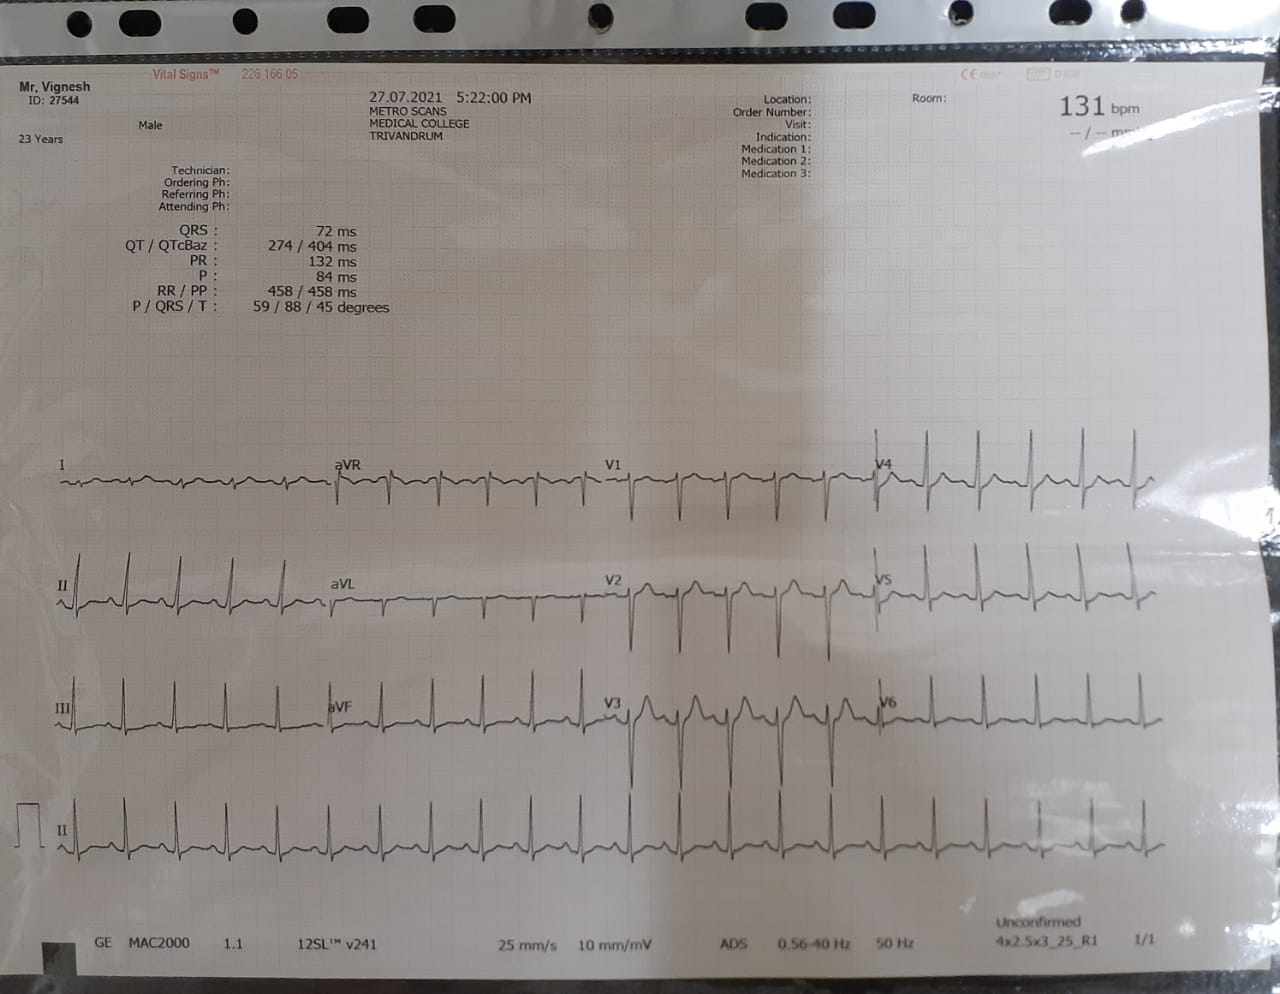

In [6]:
PIL.Image.open(str(ECG[0]))

 ## Loading Image of Eachclass by deriving the Path:  

In [7]:
Healthcare_image_dict={'ECG':list(data_dir.glob('ECG/*')),
                       'Presciption':list(data_dir.glob('Presciption/*')),
                       'Report':list(data_dir.glob('Report/*')),
                        'X-Ray':list(data_dir.glob('X-Ray/*'))}

In [8]:
Healthcare_image_dict['ECG']

[WindowsPath('C:/Users/Ritesh/OneDrive/Desktop/Healthcare/ECG/image16.jpeg'),
 WindowsPath('C:/Users/Ritesh/OneDrive/Desktop/Healthcare/ECG/image59.jpeg')]

In [9]:
Healthcare_label_dict={'ECG':0,
                       'Presciption':1,
                        'Report':2,
                         'X-Ray':3}

In [10]:
classes=['ECG','Presciption','Report','X-Ray']

In [11]:
img=cv2.imread(str(Healthcare_image_dict['ECG'][0]))

In [12]:
img.shape

(994, 1280, 3)

In [19]:
def plot_sample(w,z,index):
    plt.figure()
    plt.imshow(w[index])
    plt.xlabel(classes[z[index]])

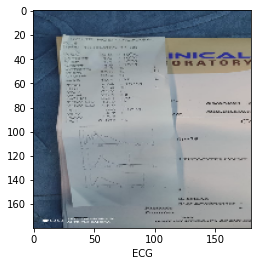

In [20]:
plot_sample(x,y,1)

## Resize Each Image 

### In order to in insert it into the CNN model we have to resize every image with equal proportion 

In [13]:
x,y=[],[]

for Healthcare_name,images in Healthcare_image_dict.items():
    for image in  images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(Healthcare_label_dict[Healthcare_name])


## Splitting Our Data Into Train and Test:

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
#We have to convert both x and y into array to perform operation 
x=np.array(x)
y=np.array(y)

In [16]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.5)

## Normalization:

### we used here normalization so that all the properties like contrast will be a range of normal senses

In [36]:
#We divide each pixcles to 255 because the value each pixcles lie from range 0 to 255
x_train=x_train/255
x_test=x_test/255

In [17]:
y_train[:50]

array([2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 3, 3, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 3, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 1, 2])

In [18]:
y_test

array([2, 1, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2,
       2, 2, 3, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2])

In [21]:
x_train.shape

(50, 180, 180, 3)

# Model Building:

## Building The CNN network: 

In [23]:
cnn=Sequential([
    #cnn
    layers.Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape=(180,180,3)),#Each image is 180,180 size
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32,activation='relu',kernel_size=(3,3)),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(4,activation='softmax')x#softmax use for more then two class
    
               ])

In [38]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 59168)             0         
                                                                 
 dense (Dense)               (None, 64)                3

In [24]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [43]:
history=cnn.fit(x_train,y_train,validation_split=0.2,epochs=40)

Epoch 1/40
2/2 [==============================] - 1s 387ms/step - loss: 0.6480 - accuracy: 0.7750 - val_loss: 0.9525 - val_accuracy: 0.8000
Epoch 2/40
2/2 [==============================] - 1s 302ms/step - loss: 0.6855 - accuracy: 0.7750 - val_loss: 0.9576 - val_accuracy: 0.8000
Epoch 3/40
2/2 [==============================] - 1s 318ms/step - loss: 0.6928 - accuracy: 0.7750 - val_loss: 0.9494 - val_accuracy: 0.8000
Epoch 4/40
2/2 [==============================] - 1s 333ms/step - loss: 0.6512 - accuracy: 0.7750 - val_loss: 0.9982 - val_accuracy: 0.8000
Epoch 5/40
2/2 [==============================] - 1s 364ms/step - loss: 0.6193 - accuracy: 0.7750 - val_loss: 1.1284 - val_accuracy: 0.8000
Epoch 6/40
2/2 [==============================] - 1s 334ms/step - loss: 0.6448 - accuracy: 0.7750 - val_loss: 1.1669 - val_accuracy: 0.8000
Epoch 7/40
2/2 [==============================] - 1s 301ms/step - loss: 0.6328 - accuracy: 0.7750 - val_loss: 1.1180 - val_accuracy: 0.8000
Epoch 8/40
2/2 [====

In [44]:
hist=pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
35,0.185491,0.925,1.119168,0.8,35
36,0.184802,0.925,1.120779,0.8,36
37,0.176529,0.925,1.115005,0.8,37
38,0.169656,0.950,1.139390,0.8,38
39,0.164799,0.950,1.191591,0.8,39


# Plotting The flow of Trainning Accuracy VS Test Accuracy :

In [45]:
def plot_history(history):
    hist=pd.DataFrame(history.history)
    hist['epoch']=history.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'],hist['accuracy'],label='Train accuracy')
    plt.plot(hist['epoch'],hist['val_accuracy'],label='Test accuracy ')
    plt.legend()
plt.show()

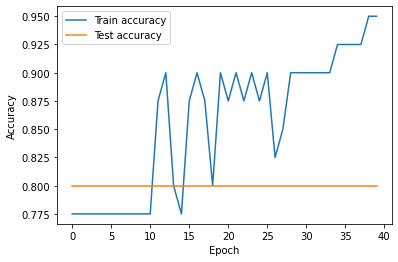

In [47]:
plot_history(history)

### Here we can see that the trainning accuracy is  95% but our testing accuarcy is 80% so this model is over fitting we can deal with that by   Data Agumentation and Dropout.

# Classification Report:

In [56]:
from sklearn.metrics import confusion_matrix,classification_report
y_predict=cnn.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_predict]
print('Classification Report:\n',classification_report(y_test,y_pred_classes))
print('Confusion matrics:\n',confusion_matrix(y_test,y_pred_classes))

2/2 [==============================] - 0s 134ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         6
           2       0.83      1.00      0.91        39
           3       1.00      0.60      0.75         5

    accuracy                           0.82        51
   macro avg       0.46      0.40      0.41        51
weighted avg       0.73      0.82      0.77        51

Confusion matrics:
 [[ 0  0  1  0]
 [ 0  0  6  0]
 [ 0  0 39  0]
 [ 0  1  1  3]]


### Here we can see that we have some misclassification this happens because of our data is unbalanced we and when our data is unbalanced we have to look after the f1-score which itself is very very low so to improve that we have to add extra data set 

# Prediction:

In [57]:
y_predict=cnn.predict(x_test)
[np.argmax(element) for element in y_predict]

2/2 [==============================] - 0s 132ms/step


[2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

### Here we can see that most of the case the  prediction is  class 2 which is 'Report' catagory because our datset is imbalanced  

# Classification Report:

In [29]:
cnn.evaluate(x_test,y_test)

2/2 [==============================] - 0s 135ms/step - loss: 0.9415 - accuracy: 0.7647


[0.9414675235748291, 0.7647058963775635]

In [34]:
y_classes=[np.argmax(element) for element in y_predict]
classes[y_classes[2]]

'Report'

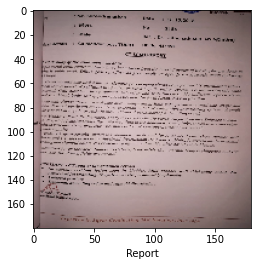

In [35]:
plot_sample(x_test,y_test,2)

# Conclusion:

### Here in this Image Classification model we can infered that our model give bad f-1 Score and it has also some misclassification  due to  less amount of  dataset and due to imbalance data we can improve it by adding more data into our model and applying some technique like'Re-Weighting','Data AugmentationandResampling'.